# Assignment 1 - KMeans - Kieran Gregg

# Dataset 2 (historical-weather)



### PART ONE : EDA

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# Taking a look at the data and correlation
df = pd.read_csv("historical-weather.csv")
corr = df.corr()
corr

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
rowID,1.000000,-0.055187,0.161720,0.034375,-0.033324,0.034986,-0.035930,0.024965,-0.032722,-0.021604,-0.031339,-0.028147
air_pressure,-0.055187,1.000000,0.046296,-0.197714,-0.077352,-0.217877,-0.060287,-0.142218,-0.094720,-0.080481,-0.112794,-0.375241
air_temp,0.161720,0.046296,1.000000,-0.014719,-0.209340,-0.046445,-0.209983,0.025727,-0.201580,-0.059231,-0.113693,-0.620038
avg_wind_direction,0.034375,-0.197714,-0.014719,1.000000,-0.027794,0.715839,-0.028626,0.621677,-0.031545,0.015005,0.025888,0.206526
avg_wind_speed,-0.033324,-0.077352,-0.209340,-0.027794,1.000000,0.022464,0.985016,-0.114903,0.971058,0.089419,0.091910,0.059483
max_wind_direction,0.034986,-0.217877,-0.046445,0.715839,0.022464,1.000000,0.021483,0.421736,0.015318,0.018410,0.036116,0.239168
max_wind_speed,-0.035930,-0.060287,-0.209983,-0.028626,0.985016,0.021483,1.000000,-0.110048,0.926046,0.088740,0.097858,0.047763
min_wind_direction,0.024965,-0.142218,0.025727,0.621677,-0.114903,0.421736,-0.110048,1.000000,-0.118068,0.004749,0.007557,0.133838
min_wind_speed,-0.032722,-0.094720,-0.201580,-0.031545,0.971058,0.015318,0.926046,-0.118068,1.000000,0.076147,0.074413,0.071531
rain_accumulation,-0.021604,-0.080481,-0.059231,0.015005,0.089419,0.018410,0.088740,0.004749,0.076147,1.000000,0.553623,0.067226


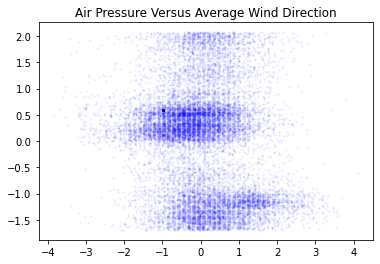

In [3]:
# Remove entries with missing data
df.dropna(inplace=True)

# selecting two of the columns 
df = df.iloc[0:,[2,4]]

from sklearn.preprocessing import StandardScaler

# transform the data
array = df.values
array = StandardScaler().fit_transform(array)

# plotting the weather data
plt.scatter(array[:, 0], array[:, 1], c="b", s=2, alpha=0.05)
plt.title("Air Pressure Versus Average Wind Direction")
plt.show()

### PART TWO : Implement KMeans

In [4]:
num_clusters = 3

In [5]:
# running the built in KMeans algorithm on our blobs dataset, with 3 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(array)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# output data to csv, to be read by my Kmeans
array_df = pd.DataFrame(array)
array_df.to_csv("weather.csv", header=None, index=False)

In [6]:
# Running my Java Kmeans
import os

input_path = "weather.csv"
labels_output_path = "weather_labels_output.csv"
centers_output_path = "weather_centers_output.csv"
random_state = 42
num_centroids = num_clusters
num_max_iterations = 100

cwd = os.getcwd()
os.chdir(cwd)
os.system('javac KMeans.java')   
run_command = "java " + "KMeans " + input_path + " " + labels_output_path + " " + centers_output_path + " " + str(random_state) + " " + str(num_centroids) + " " + str(num_max_iterations) 
os.system(run_command)

# store the labels and centers from the csv files generated by java kmeans
output_labels = pd.read_csv("weather_labels_output.csv", header=None).to_numpy().flatten()
output_centers = pd.read_csv("weather_centers_output.csv", header=None).to_numpy()

args [weather.csv, weather_labels_output.csv, weather_centers_output.csv, 42, 3, 100]

current iteration: 0
centroid: 0 at coordinates: 0.1868784147476006, -1.1466741843624448
centroid: 1 at coordinates: -1.255058937309772, 0.0808758793518579
centroid: 2 at coordinates: 0.1541071112917436, 1.2454746577474785

current iteration: 1
centroid: 0 at coordinates: 0.563122354607542, -1.139778528629221
centroid: 1 at coordinates: -1.0496158954225228, 0.24516485861656823
centroid: 2 at coordinates: 0.31975260445506853, 0.8795721358731245

current iteration: 2
centroid: 0 at coordinates: 0.6166378098585413, -1.1997633936103724
centroid: 1 at coordinates: -1.0254752398424154, 0.25965761116307984
centroid: 2 at coordinates: 0.3828207397697056, 0.8259856905211898

current iteration: 3
centroid: 0 at coordinates: 0.625967443986313, -1.2128601123107017
centroid: 1 at coordinates: -1.009539141843813, 0.26600095477473806
centroid: 2 at coordinates: 0.40571199127296265, 0.815707695120794

current iterat

#### ^13 iterations were run, as KMeans needed many iterations to find and set the centroids to the center of the clusters, as the clusters are not very distinct
#### The first iteration (0) is the randomly selected initial position for the centroids (chosen from one of the random data points)
#### After the final iteration (12), the centroids are in their final position

### PART THREE : Comparing # Comparing performance using v_measure_score

In [7]:
# Comparing performance using v_measure_score
from sklearn.metrics import v_measure_score

score = v_measure_score(labels, output_labels)
score

0.9826265696751312

#### ^My implementation receives a score of ~ 0.9826 (~98.3%) for the weather data

In [8]:
# Comparing the centers from the sklearn kmeans to the calculated centers from my kmeans

print("sklearn centers\n", centers, "\n")
print("my java kmeans centers\n", output_centers)

sklearn centers
 [[ 0.62058427 -1.21602632]
 [-0.97332434  0.28394818]
 [ 0.44295328  0.82790408]] 

my java kmeans centers
 [[ 0.62237956 -1.21604898]
 [-0.98206169  0.27943297]
 [ 0.43420124  0.82403333]]


#### ^The output for the centers is the very close

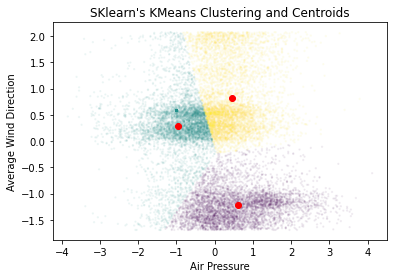

In [9]:
# plotting the blobs dataset 
plt.scatter(array[:,0], array[:,1], s=2, c=labels, alpha=0.05)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(centers[:,0], centers[:,1], color='red')

plt.title("SKlearn's KMeans Clustering and Centroids")
plt.xlabel('Air Pressure')
plt.ylabel('Average Wind Direction')
plt.show()

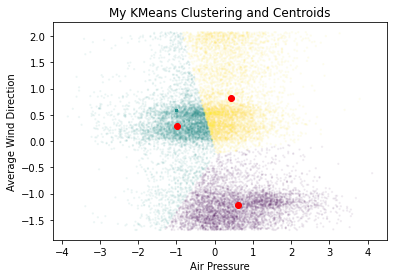

In [10]:
# plotting the blobs dataset 
plt.scatter(array[:,0], array[:,1], s=2, c=output_labels, alpha=0.05)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(output_centers[:,0], output_centers[:,1], color='red')

plt.title("My KMeans Clustering and Centroids")
plt.xlabel('Air Pressure')
plt.ylabel('Average Wind Direction')
plt.show()

#### Taking a look at the scores and the centers comparatively between the sklearn KMeans and my Java Kmeans, in addition to the two plots above, it is clear my implementation works very well and produces the expected results, finding the centers and assigning the clusters as intended